In [11]:
import numpy as np
from time import time

In [2]:
def make_array(n):
    
    return np.random.randint(-100, 100, n)

# First Implementation

In [9]:
def no_queue(array, maxStep):

    # Cache allocation
    memorization = maxStep * [0]
    
    # Initialization
    memorization[0] = array[0]
    for k in range(1, maxStep):
        memorization[k] = array[k] + max(memorization[:k])
        
    # Recursion
    for a in array[maxStep:]:
        
        new_mem = a + max(memorization)
        memorization[:-1] = memorization[1:]
        memorization[-1] = new_mem
    
    return memorization[-1]

    

# Second implementation

In [45]:
class QueueMax:
    
    def __init__(self, first_batch):
        
        self.back = first_batch
        self.front = []
        self.max = max(first_batch)
    
    
    def compute_current_max(self):
        
        M = -float('inf')
        
        for x in self.back:
            M = x if x > M else M
        for x in self.front:
            M = x if x > M else M
            
        return M
    
    
    def get_max(self):
        return self.max
    
    
    def queue(self, x):
        
        self.back.append(x)
    
    
    def unqueue(self):
        
        if not self.front:
            self.back.reverse()
            self.front = self.back
            self.back = []
        
        return self.front.pop()
    
    
    def update(self, x):
        
        self.queue(x)
        out = self.unqueue()
        
        if out == self.max:
            self.max = self.compute_current_max()
        else:
            self.max = max(self.max, x)
        
        
        return self.max
        
        

In [93]:
def with_queue(array, maxStep):

    # Cache allocation
    memorization = array[:1]
    
    for x in array[1:maxStep]:
        memorization.append( x + max(memorization))
        
    q = QueueMax(memorization)
    
    # Recursion
    for a in array[maxStep:]:
        
        new_mem = a + q.get_max()
        q.update(new_mem)
    
    return new_mem

In [94]:
def timeit(f, array, maxStep):
    
    t0 = time()

In [103]:
def compare_Ns():
    
    Ns = [100, 1000, 5000, 10000, 20000]
    k = 5
    r = 10
    
    timings_no_queue = []
    timings_with_queue = []
    
    for N in Ns:
        
        arrays = [ list(make_array(N)) for _ in range(r) ]
        
        t0 = time()
        
        for arr in arrays:
            
            no_queue(arr, k)
        
        t1 = time()
        
        timings_no_queue.append( (t1-t0) / r )
        
        
        for arr in arrays:
            
            with_queue(arr, k)
            
        t2 = time()
        
        timings_with_queue.append( (t2-t1) / r )
    
    
    plt.plot(Ns, timings_no_queue, label = 'no')
    plt.plot(Ns, timings_with_queue, label = 'q')
    plt.legend()
        

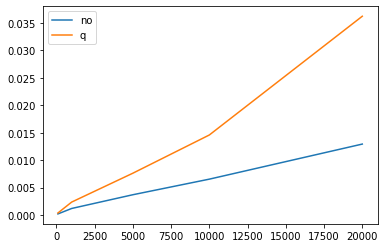

In [104]:
compare_Ns();

In [107]:
def compare_Ks():
    
    N = 10000
    Ks = [5, 10, 20, 50, 100, 500, 1000, 2000]
    r = 10
    
    timings_no_queue = []
    timings_with_queue = []
    
    for k in Ks:
        
        arrays = [ list(make_array(N)) for _ in range(r) ]
        
        t0 = time()
        
        for arr in arrays:
            
            no_queue(arr, k)
        
        t1 = time()
        
        timings_no_queue.append( (t1-t0) / r )
        
        
        for arr in arrays:
            
            with_queue(arr, k)
            
        t2 = time()
        
        timings_with_queue.append( (t2-t1) / r )
    
    
    plt.plot(Ns, timings_no_queue, label = 'no')
    plt.plot(Ns, timings_with_queue, label = 'q')
    plt.legend()
        

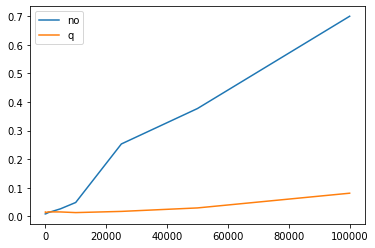

In [108]:
compare_Ks()

In [112]:
def compare_frac():
    
    Ns = [500, 1000, 5000, 10000, 20000]
    # k = 5
    r = 10
    
    timings_no_queue = []
    timings_with_queue = []
    
    for N in Ns:
        
        arrays = [ list(make_array(N)) for _ in range(r) ]
        
        t0 = time()
        
        for arr in arrays:
            
            no_queue(arr, N // 100)
        
        t1 = time()
        
        timings_no_queue.append( (t1-t0) / r )
        
        
        for arr in arrays:
            
            with_queue(arr, N // 100)
            
        t2 = time()
        
        timings_with_queue.append( (t2-t1) / r )
    
    
    plt.plot(Ns, timings_no_queue, label = 'no')
    plt.plot(Ns, timings_with_queue, label = 'q')
    plt.legend()
        

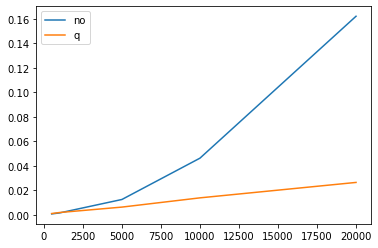

In [113]:
compare_frac()